# pySIMBA

## System for Integrating Multiplatform Data to Build the Atmospheric Column (SIMBA)

* Python based SIMBA was adapted from Interactive Data Language (IDL) code by [see Wingo et al. 2018].
* pySIMBA incoporates variety of precipitation sensors into a single netCDF data product or python object.
* Developed by NASA GPM-GV Team
* V1.0 - 08/24/2023 - Released by Charanjit Pabla NASA GSFC-WFF/SSAI

### Notebook is to understand how the code works and what type of output is produced.
### pySIMBA can run on command line or in a notebook as shown.

### 1) Install all required libraries. Refer to the README for more details.

In [2]:
import pysimba
import plot
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import Normalize


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### 2) Set options that are required to create the column.

Edit the pysimba_params_dict.txt if needed. Make sure the directories are set correctly.

### 3) Produce the column for a given date.
Note, dataset must be located in the data directory specified above.

In [3]:
column = pysimba.BuildColumn(2020, 10, 29)

...Searching for Main Platform NPOL file...
   --> file found
...Searching for VN Radars KDOX file...
*** NO KDOX FILES FOUND! SKIPPING... KDOX DATA WILL NOT BE INCLUDED ***
...Searching for Gauge files...
   --> files found
...Searching for APU files...
   --> files found
...Searching for 2DVD files...
   --> files found
...Searching for MRR file...
   --> file found
...Searching for GPM-DPR file...
   --> file found
...Searching for MRMS file(s)...
*** NO MRMS FILES FOUND! SKIPPING... MRMS DATA WILL NOT BE INCLUDED ***
---------------------------------------------
   Column Box Centered On: WFFPad
      lat: 37.93 lon: -75.47
   Column Box Grid:
       horiz spacing [m]: 500
       horiz extent [m]: 5000
       horiz grid boxes: 10
       vert spacing [m]: 250
       vert extent [m]: 6000
       vert grid boxes: 24
   Column Box Grid Latitudes:
       37.91 37.92 37.92 37.93 37.93 37.93 37.94 37.94 37.95 37.95 37.96
   Column Box Grid Longitudes: 
      -75.50 -75.49 -75.49 -75.48 -7

    MRR unit located in column box AND available during time interval
-----in DPR section-----
--- DPR timestamp: set_in_get_dpr
--- DPR file type: 2A-CS-CONUS
searching in DPR [km]: 50.0
Swath HS:
Swath MS:
Swath NS:
 --- GPM 2ADPR MODULE ERROR!!! --- 
 --- CAN NOT LOCATE DPR HS SCAN WITH COLUMN GRID CENTER POINT! --- 
 --- SKIPPING HS DPR DATA! --- NO HS DPR VALUES INTO COLUMN! --- 
 -- HS: start, end, # of scans: 370, 392, 0
 -- MS: start, end, # of scans: 370, 396, 27
 -- NS: start, end, # of scans: 370, 396, 27
main plat [p,s]: 35, 391
...DPR timestamp - main platform: 20201029_073705
col center [p,s]: 33, 383
...DPR timestamp - col grid cntr: 20201029_073659
-----in netCDF section-----
------------------------------------
---Now Writing New Column .nc File: 
          column_NPOL_WFFPad_20201029_0738.nc
--> column file has been saved /Users/cpabla/OneDrive - NASA/Desktop/jupyter_notebooks/simba/v1.0/column_nc_file/2020/1029/column_NPOL_WFFPad_20201029_0738.nc
--> column header .t

### 4) SIMBA column has been created, now read in the netCDF file using xarray.

In [4]:
fp = '/Users/cpabla/OneDrive - NASA/Desktop/jupyter_notebooks/simba/v1.0/column_nc_file/2020/1029/column_NPOL_WFFPad_20201029_0736.nc' 
ds = xr.load_dataset(fp)
case = os.path.basename(fp).split('_')[3]

In [5]:
ds

<xarray.Dataset>
Dimensions:                              (x: 11, y: 11, z: 25, t: 9)
Coordinates:
  * x                                    (x) float32 -2.5e+03 -2e+03 ... 2.5e+03
  * y                                    (y) float32 -2.5e+03 -2e+03 ... 2.5e+03
  * z                                    (z) float32 0.0 250.0 ... 6e+03
  * t                                    (t) float32 -4.0 -3.0 -2.0 ... 3.0 4.0
Data variables: (12/149)
    lat                                  (y) float32 37.91 37.92 ... 37.95 37.96
    lon                                  (x) float32 -75.5 -75.49 ... -75.44
    npol_avail                           <U1 ''
    lev2_avail                           <U1 ''
    apu_avail                            <U1 ''
    twodvd_avail                         <U1 ''
    ...                                   ...
    dpr_MS_PIA_cloudice                  (z, y, x) float32 0.9359 0.9359 ... nan
    dpr_MS_PIA_watervapor                (z, y, x) float32 0.2321 0.2321 ... nan
    dpr_MS_PIA_oxygen                    (z, y, x) float32 0.54 0.54 ... nan nan
    dpr_MS_TPW_liquid                    (z, y, x) float32 169.4 169.4 ... nan
    dpr_MS_TPW_ice                       (z, y, x) float32 0.0 0.0 ... nan nan
    dpr_MS_eff_PIA                       (z, y, x) float32 -0.6537 ... nan
Attributes:
    box_centered_on:                WFFPad
    box_center_lat:                 37.934527777777774
    box_center_lon:                 -75.4708888888889
    grid_spacing_vert:              250
    grid_spacing_horiz:             500
    grid_extent_vert:               6000
    grid_extent_horiz:              5000
    grid_spacing_and_limits_units:  meters
    main_platform:                  NPOL
    main_plat_timestamp:            20201029_073622
    pySIMBA_version:                v0.1

### 5) Create a plot with disdrometer Reflectivity overlaid with NPOL.

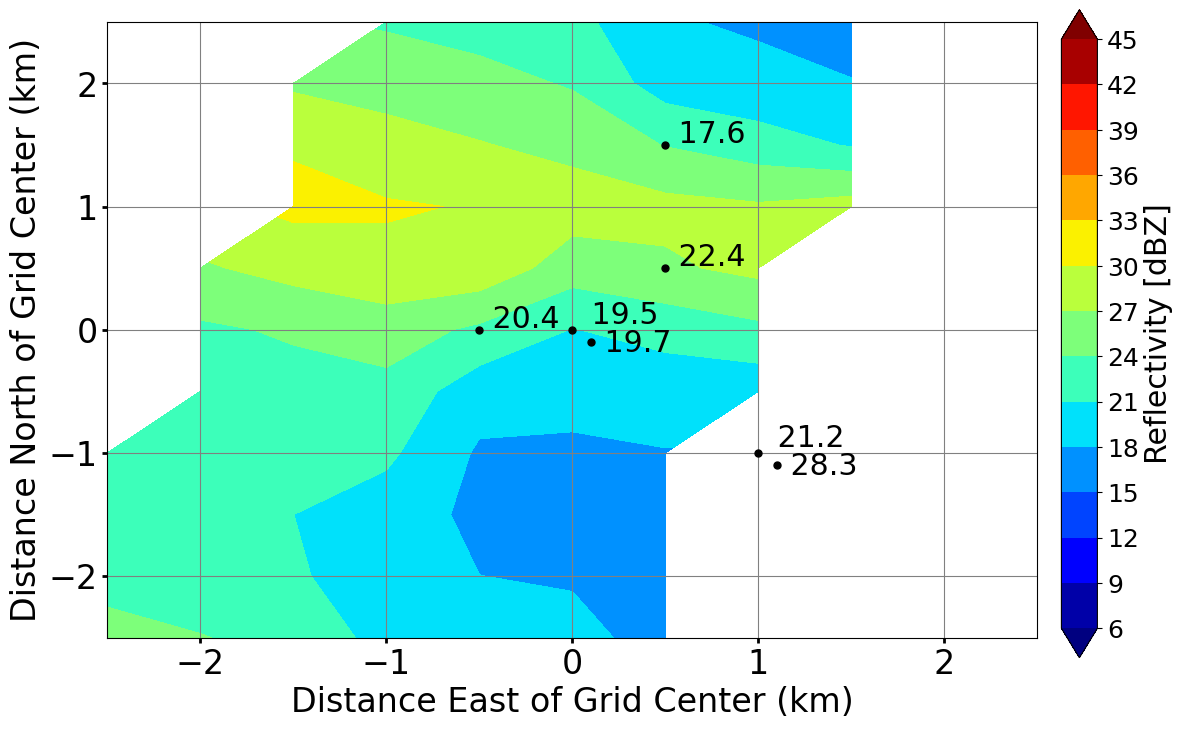

In [11]:
twodvd_data = ds['twodvd_param_ter_refRayleigh'].sel(z=0).sel(t=0).data
apu_data = ds['apu_reflectivity_in_Rayleigh_tfs'].sel(z=0).sel(t=0).data
npol_data = ds['lev2_NPOL_CZ'].sel(z=1000).data
x = ds['x'].data
y = ds['y'].data
plot.column_grid_reflectivity(x, y, twodvd_data, apu_data, npol_data, case, png=False)

### 6) Create a plot with disdrometer Reflectivity overlaid with GPM DPR, instead.

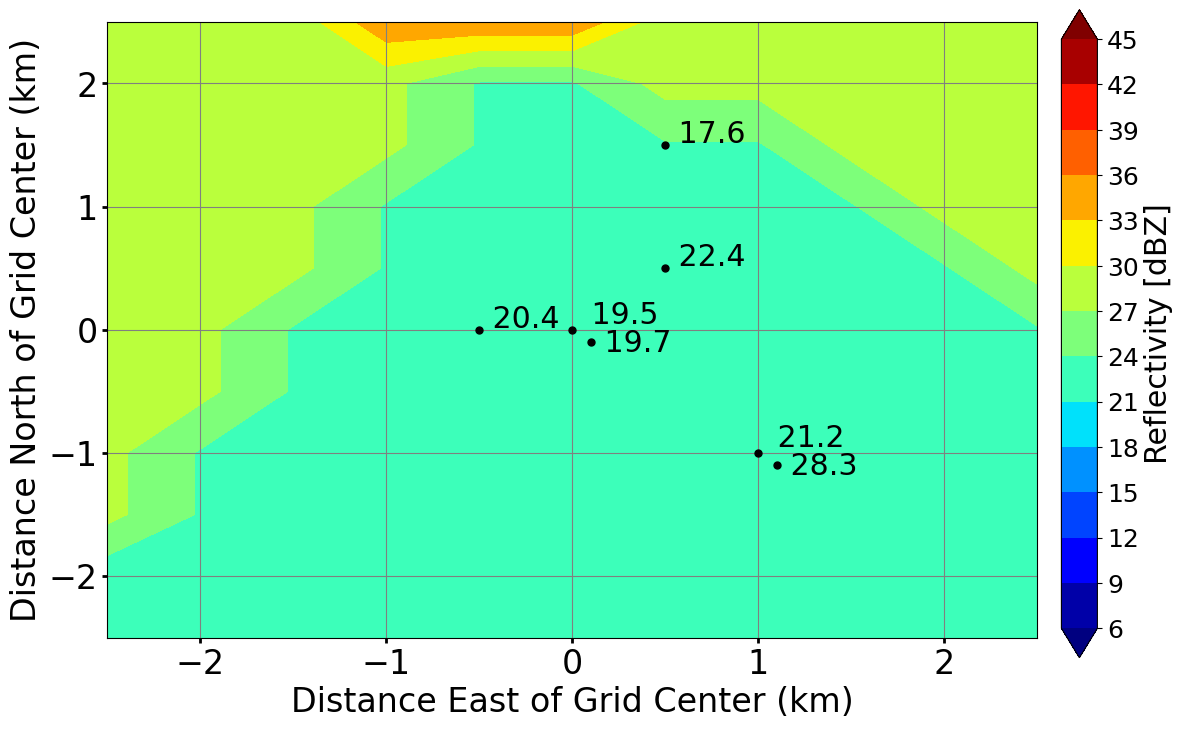

In [10]:
dpr_data = ds['dpr_NS_corZFacNearSfc'].sel(z=0).data
plot.column_grid_reflectivity(x, y, twodvd_data, apu_data, dpr_data, case, png=False)

### 7) Create a plot with disdrometer rain rate overlaid with NPOL.

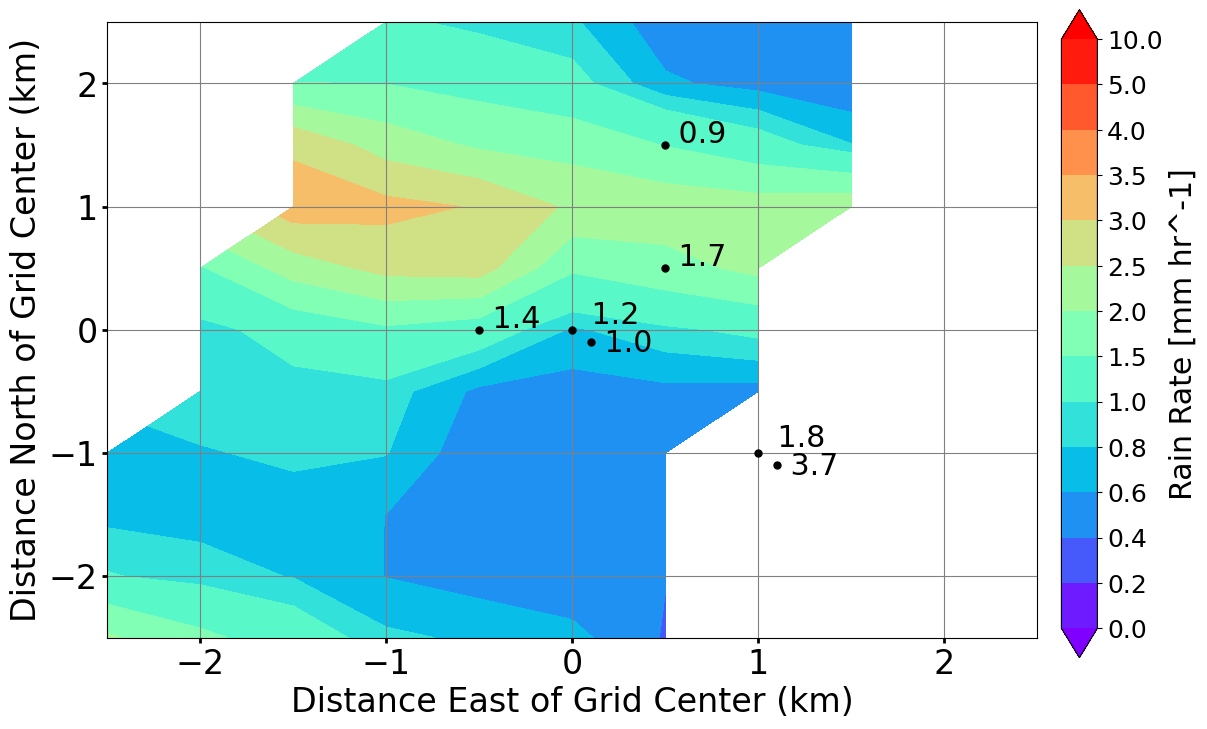

In [13]:
twodvd_data = ds['twodvd_param_ter_rainrate'].sel(z=0).sel(t=0).data
apu_data = ds['apu_rain_rate_tfs'].sel(z=0).sel(t=0).data
npol_data = ds['lev2_NPOL_RC'].sel(z=1000).data
plot.column_grid_rain(x, y, twodvd_data, apu_data, npol_data, case, png=False)

### 8) Create a plot with disdrometer rain rate overlaid with GPM DPR, instead.

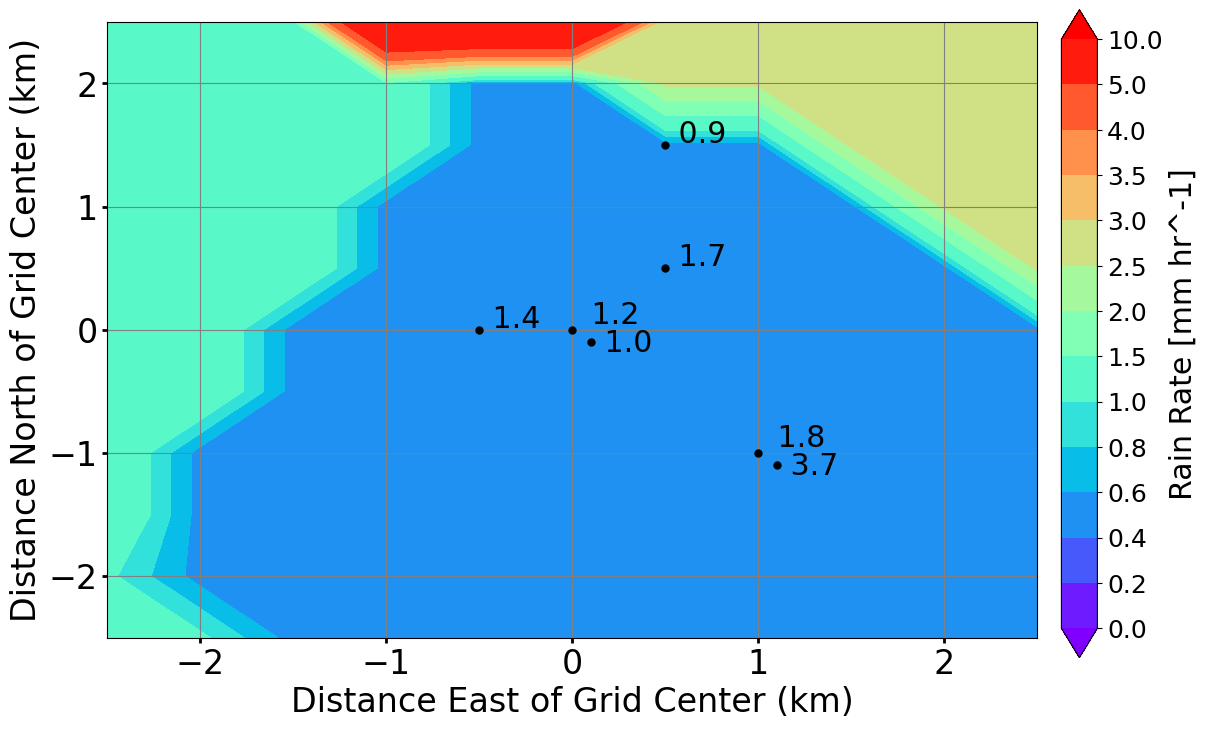

In [14]:
dpr_data = ds['dpr_NS_precipRateNearSfc'].sel(z=0).data
plot.column_grid_rain(x, y, twodvd_data, apu_data, dpr_data, case, png=False)